# Top 50 Social Media accounts with most subcribers 

I would like to analyze what features successful social media accounts have in common. The accounts in the data set come from a wide range of unspecified social media platforms. This analysis reviews language spoken, country of origin, and categories. 

In [1]:
#Start importing packages

import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
top = pd.read_excel('./MostSubscribers.xlsx')
#got it from https://www.kaggle.com/kkhandekar/social-media-platform-with-most-subscribers

In [3]:
top.shape

(50, 6)

In [4]:
top.columns

Index(['Rank', 'Channel', 'Subscribers(millions)', 'Language', 'Category',
       'Country'],
      dtype='object')

In [5]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   50 non-null     int64  
 1   Channel                50 non-null     object 
 2   Subscribers(millions)  50 non-null     float64
 3   Language               50 non-null     object 
 4   Category               50 non-null     object 
 5   Country                50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


In [6]:
top.Rank.mean()

25.5

In [7]:
top.drop(['Rank'], axis=1, inplace=True)

In [110]:
top.head(10)

,Channel,Subscribers(millions),Language,Category,Country
0,T-Series,193.0,Hindi,Music,India
1,Cocomelon - Nursery Rhymes,118.0,English,Education,United States
2,SET India,115.0,Hindi,Entertainment,India
3,PewDiePie,110.0,English,Gaming,Sweden
4,Kids Diana Show,83.5,English,Film,Ukraine
5,WWE,81.8,English,Sports,United States
6,Zee Music Company,77.1,Hindi,Music,India
7,Like Nastya,76.8,Russian,Entertainment,Russia
8,5-Minute Crafts,73.7,English,How-to,Cyprus
9,Vlad and Niki,72.3,English,Entertainment,Russia


In [9]:
top['Channel'].nunique()

50

In [10]:
top['Category'].nunique()

9

In [11]:
top['Language'].nunique()

7

In [12]:
top['Subscribers(millions)'].sum().round()

2996.0

In [13]:
top.describe()

,Subscribers(millions)
count,50.000000
mean,59.918000
std,26.828097
min,40.000000
25%,43.875000
50%,50.600000
75%,65.175000
max,193.000000


## Language

In [14]:
top['Language'].value_counts()

English       21
Hindi         14
Spanish        6
Portuguese     4
Korean         3
Bhojpuri       1
Russian        1
Name: Language, dtype: int64

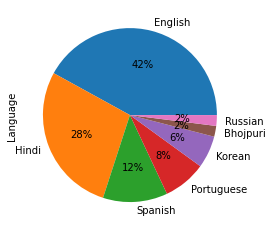

In [15]:
top['Language'].value_counts().plot(kind='pie', autopct='%1.f%%');

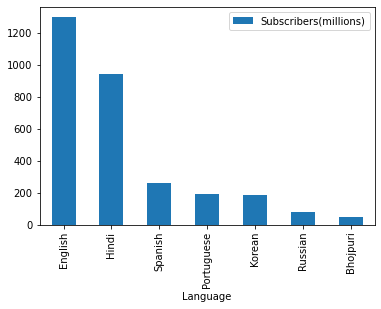

In [16]:
top.groupby(['Language']).sum().sort_values('Subscribers(millions)', ascending = False).plot(kind = 'bar');


## Add annotation to bars


There are 7 languages spoken among the most successful accounts. 
21 accounts use english, 14 use Hindi, and 6 use Spanish. They represent 82% of all subscribers

## Country

In [17]:
top['Country'].nunique()

15

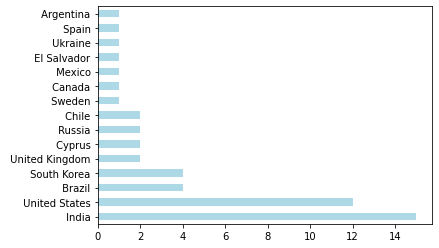

In [18]:
top['Country'].value_counts().plot(kind = 'barh', color="lightblue");

In [19]:
country_lan = top.groupby(['Country']).sum()

In [20]:
country_lan.sort_values(by='Subscribers(millions)', ascending = False)

,Subscribers(millions)
Country,
India,985.6
United States,706.6
South Korea,238.9
Brazil,192.1
Russia,149.1
Cyprus,115.6
Sweden,110.0
United Kingdom,89.2
Chile,86.9


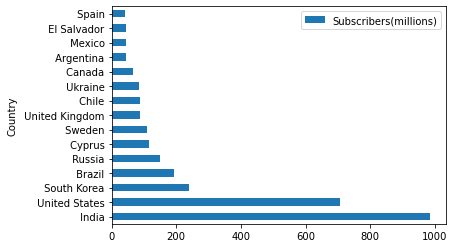

In [21]:
country_lan.sort_values(by='Subscribers(millions)', ascending = False).plot(kind='barh');

All 50 account come from 15 countries. Only 2 countries have 12 or more acounts, about 50% of accounts come from one country.

## Subcribers

In [22]:
top['Subscribers(millions)'].mean()

59.91800000000003

In [23]:
top['Subscribers(millions)'].std()

26.828097439902397

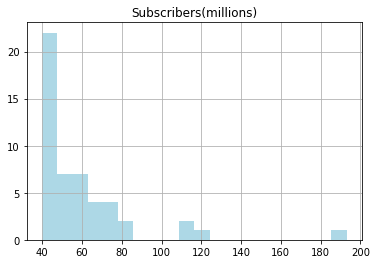

In [24]:
#y.hist(y, bins = 4)
top.hist('Subscribers(millions)', bins = 20, color = 'lightblue', rwidth= 1);

On average each account has 59.9 million subscribers. There are over 20 accounts on the 40million subscribers side. The distribution of millions of subcribers is very spread out, with over 2std higher, which tells us they may be outliers. 

## Categories

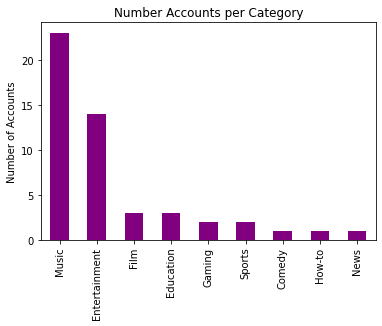

In [80]:
top['Category'].value_counts().plot(kind='bar', rot=90, color='purple', ylabel='Number of Accounts', title='Number Accounts per Category');

In [107]:
CatCountry = top.groupby(['Category','Country'])['Subscribers(millions)'].sum().sort_values(ascending = False)
CatCountry


Category       Country        
Music           India             551.2
                United States     326.1
Entertainment   India             276.5
Music           South Korea       186.9
Entertainment   Russia            149.1
Sports          United States     138.5
Education       United States     118.0
Gaming          Sweden            110.0
Music           United Kingdom     89.2
Entertainment   Chile              86.9
                Brazil             84.3
Film            Ukraine            83.5
How-to          Cyprus             73.7
Entertainment   United States      69.8
Music           Canada             65.3
                Brazil             64.8
Film            India              58.8
                United States      54.2
Education       South Korea        52.0
                India              51.5
News            India              47.6
Music           Argentina          45.2
Entertainment   Mexico             44.8
Gaming          El Salvador        43.1
Comedy   

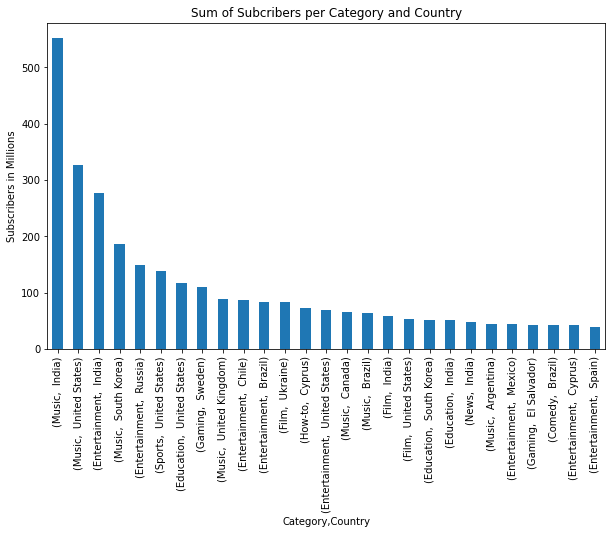

In [26]:
top.groupby(['Category','Country'])['Subscribers(millions)'].sum().sort_values(ascending = False).plot.bar(figsize = (10,6), ylabel='Subscribers in Millions', title='Sum of Subcribers per Category and Country');


In [32]:
CategoryMean = top.groupby('Category')[['Subscribers(millions)']].mean().round().sort_values('Subscribers(millions)', ascending = False)
CategoryMean

,Subscribers(millions)
Category,
Gaming,77.0
Education,74.0
How-to,74.0
Sports,69.0
Film,66.0
Music,58.0
Entertainment,57.0
News,48.0
Comedy,43.0


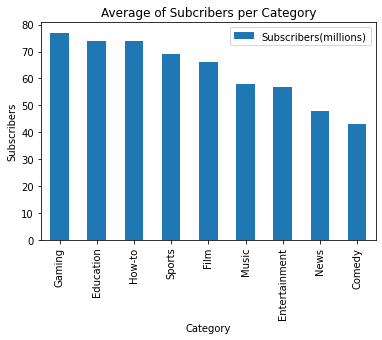

In [36]:
CategoryMean.plot(kind = 'bar', ylabel='Subscribers', title='Average of Subcribers per Category');

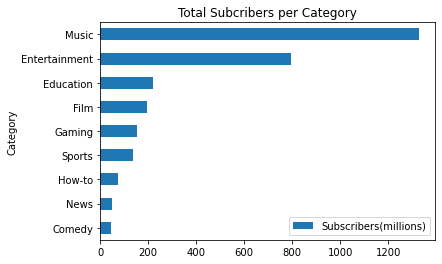

In [38]:
top.groupby(['Category']).sum().sort_values('Subscribers(millions)', ascending = True,).plot(kind = 'barh', title='Total Subcribers per Category');

In [83]:
filter1 = top[top['Category']=='Music']
filter1.value_counts().sum()

23

In [93]:
filter1

,Channel,Subscribers(millions),Language,Category,Country
0,T-Series,193.0,Hindi,Music,India
6,Zee Music Company,77.1,Hindi,Music,India
11,Blackpink,67.0,Korean,Music,South Korea
12,Justin Bieber,65.3,English,Music,Canada
13,Canal KondZilla,64.8,Portuguese,Music,Brazil
14,HYBE LABELS,61.5,Korean,Music,South Korea
17,BangtanTV,58.4,Korean,Music,South Korea
20,Shemaroo Filmi Gaane,55.4,Hindi,Music,India
22,Marshmello,53.9,English,Music,United States
25,Ariana Grande,49.7,English,Music,United States


In [84]:
filter2 = top[top['Category']=='Gaming']
filter2.value_counts().sum()

2

In [94]:
filter2

,Channel,Subscribers(millions),Language,Category,Country
3,PewDiePie,110.0,English,Gaming,Sweden
39,Fernanfloo,43.1,Spanish,Gaming,El Salvador


In [97]:
filter3 = top[top['Category']=='Education']
filter3.value_counts().sum()

3

In [98]:
filter3

,Channel,Subscribers(millions),Language,Category,Country
1,Cocomelon - Nursery Rhymes,118.0,English,Education,United States
23,Pinkfong! Kids' Stories & Songs,52.0,English,Education,South Korea
24,ChuChu TV Nursery Rhymes & Kids Songs,51.5,Hindi,Education,India


In [96]:
#SortedCat = top.sort_values("Category")
#SortedCat

There are 9 unique categories. Music is the one with most subscriber in total having India and the US as the origin of the most followed accounts, with over 800 million of followers combined. Gaming and Education has in average the most followers per account, however there are a lot less individual channels in this categories than in Music. 

## Conclusions

The 50 most followed accounts in Social Media speak 7 languanges are spoken, have 2.9 Billion Subscribers from around the world, and are separated in 9 categories. 

The top 3 origin countries of the creators of the accounts are USA, India, and Brazil. 

The market seems to be dominated by the Music Category, but there could be an opportunity for Categories like Gaming and Education to grow if they aim to grow their channels in India and Spanish speaking countries. 